# Data Visualization Practice

We present to you 2 challenging datasets without description and, it will be your job to do the proper analysis using Pandas, Statistics, and Data Visualization tools.

Guide your analysis using the Theory notebook already seen in the lectures.

If you find yourself stuck, try formulating questions and searching for an answer in your data.

Work in groups to brainstorm about the challenge.




In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import ipywidgets as widgets

## Admissions Prediction dataset

This dataset records the chance of being admitted to college of various prospective students in terms of their qualifications.

[Original source](https://github.com/Shankhanil/College-Admission-Predicion)

In [2]:
# We import the dataset from file:
admissions_df = pd.read_csv(
    "https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/Admission_Predict.csv"
)
admissions_df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


The features on the data are:

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose -(SOP) Strength ( out of 5 )
- Letter of Recommendation-(LOR) Strength ( out of 5 )
- Undergraduate GPA-CGPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

### Importing libraries

In [3]:
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [4]:
admissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


- We have no missing values.
- 'Serial No.' is just an index for students, which we can omit it.
- We are also removing the blank sapces from 'Chance of Admit' and 'LOR'.

In [5]:
admissions_df.drop(labels="Serial No.", axis=1, inplace=True)
admissions_df.rename(
    columns={"Chance of Admit ": "Chance of Admit", "LOR ": "LOR"}, inplace=True
)

In [6]:
admissions_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


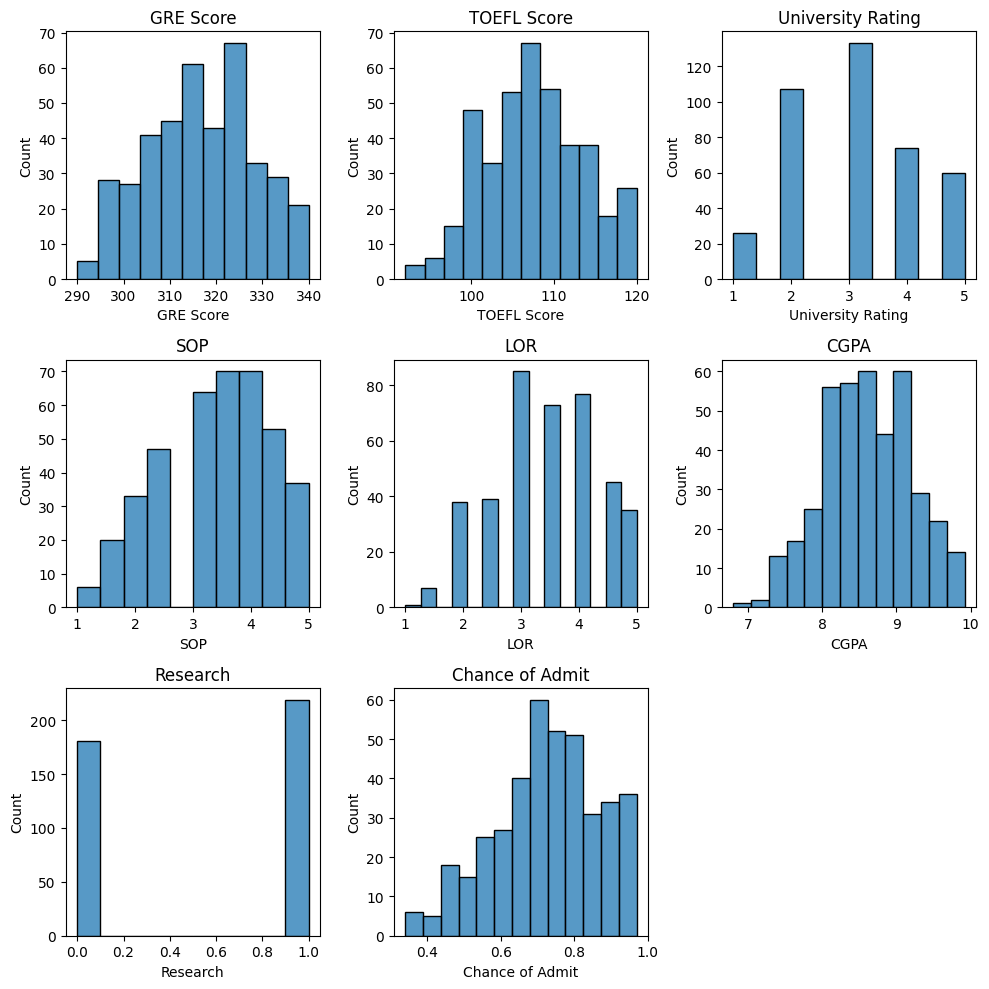

In [7]:
list_features = [
    "GRE Score",
    "TOEFL Score",
    "University Rating",
    "SOP",
    "LOR",
    "CGPA",
    "Research",
    "Chance of Admit",
]
fig = plt.figure(figsize=(10, 10))

for i in range(len(list_features)):
    plt.subplot(3, 3, i + 1)
    plt.title(list_features[i])
    sns.histplot(admissions_df[list_features[i]])

plt.tight_layout()

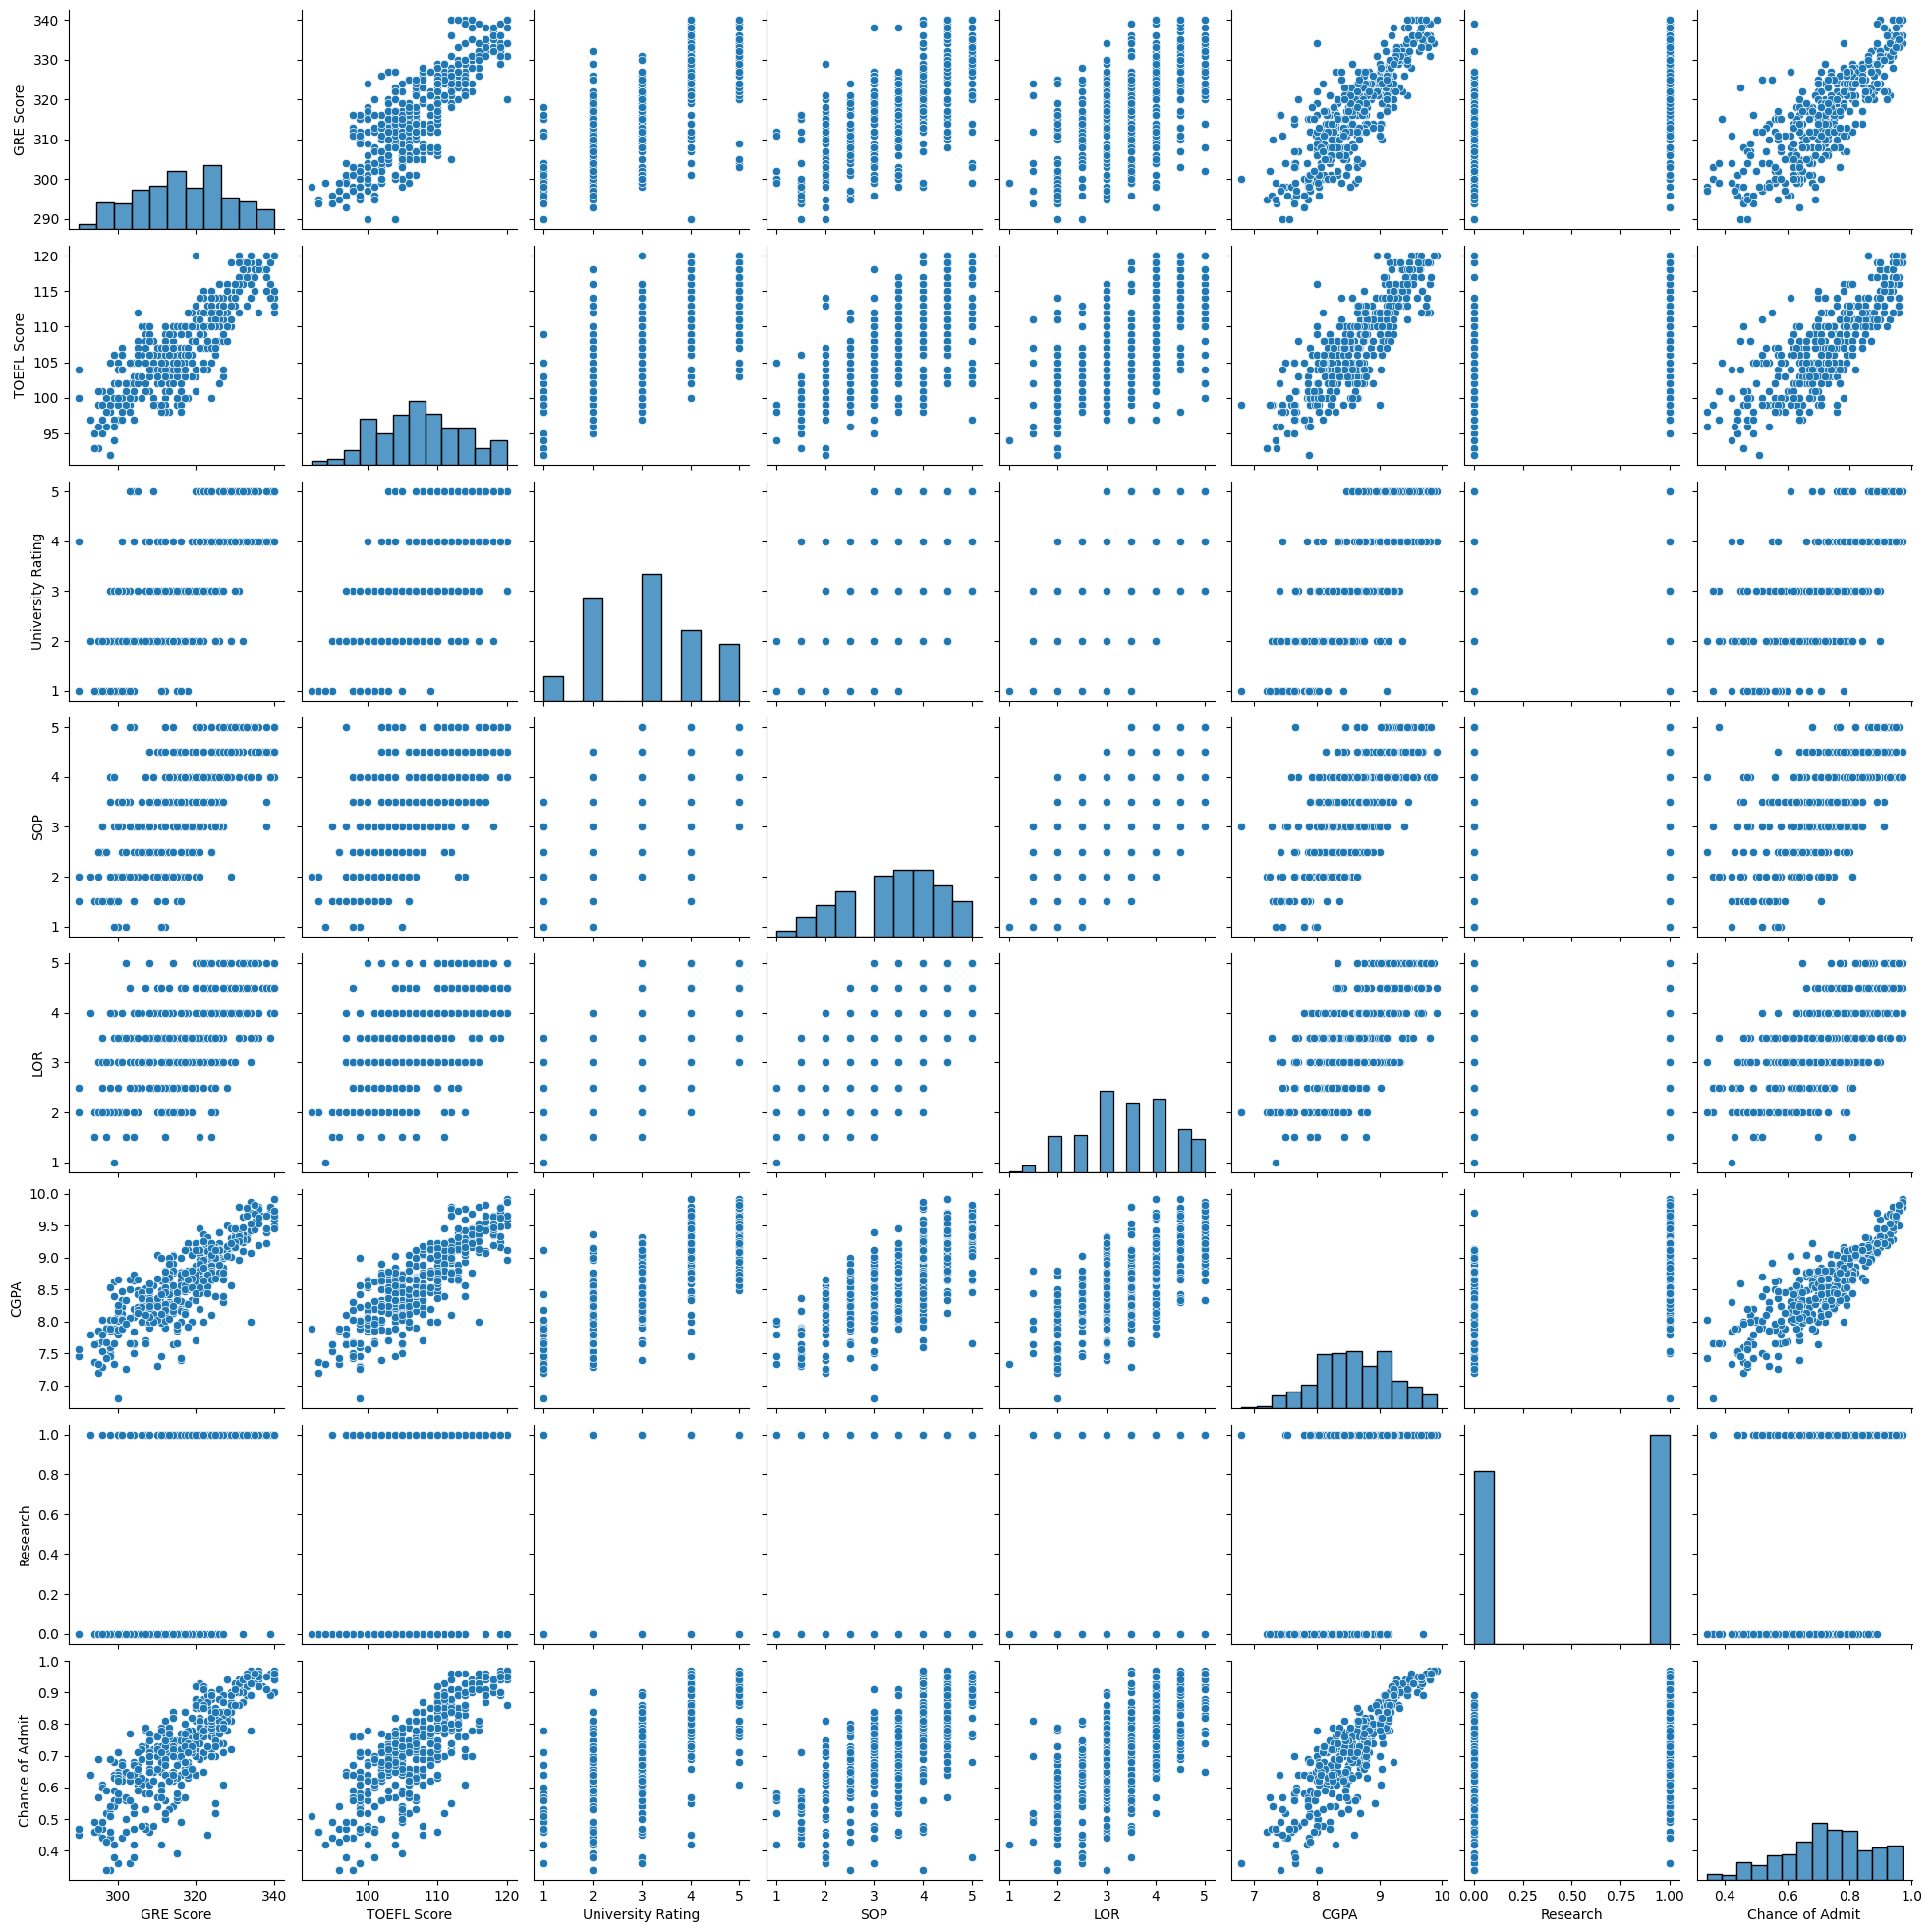

In [8]:
sns.pairplot(admissions_df)

### Correlation analysis

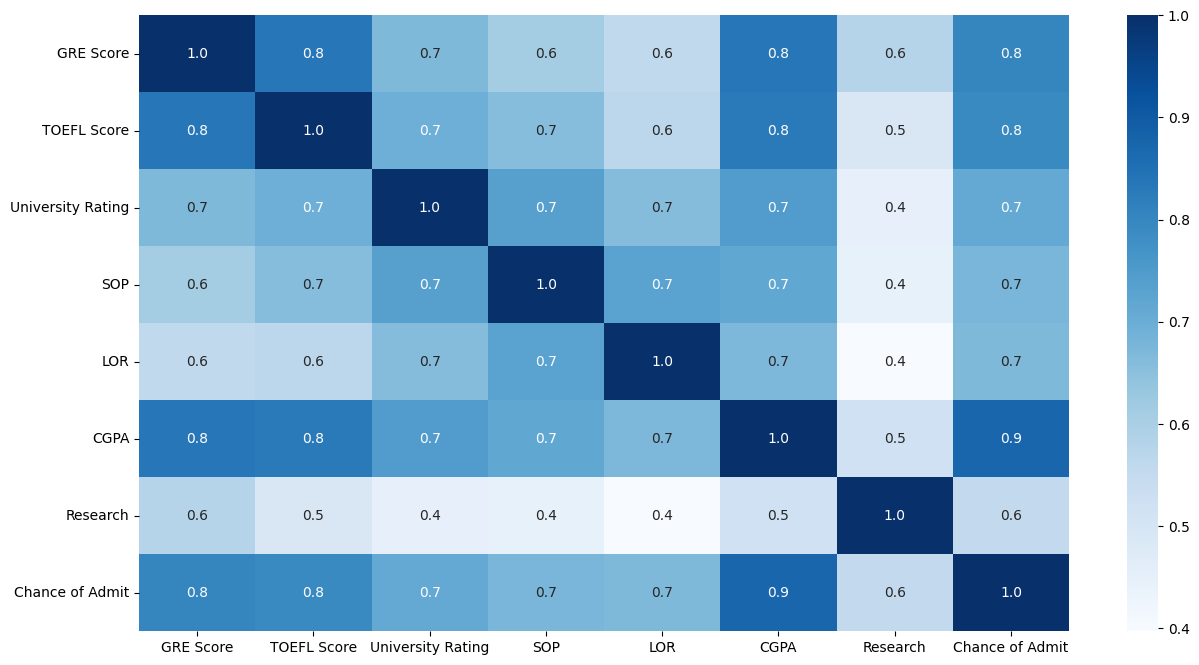

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    admissions_df.corr(),
    annot=True,
    cbar=True,
    cmap="Blues",
    fmt=".1f",
)
plt.show()

Chance of admit has strong positive correlation with:

- CGPA (0.9)
- GRE Score (0.8)
- TOEFL Score (0.8)

**CGPA**

The Cumulative Grade Point Average is a 10 point grading system.

From the data shown below, it appears the submissions are normally distributed. With a mean of 8.6 and standard deviation of 0.6.

**CGPA** vs **Chance of Admit**

It appears as applicant's CGPA has a strong correlation with their chance of admission.

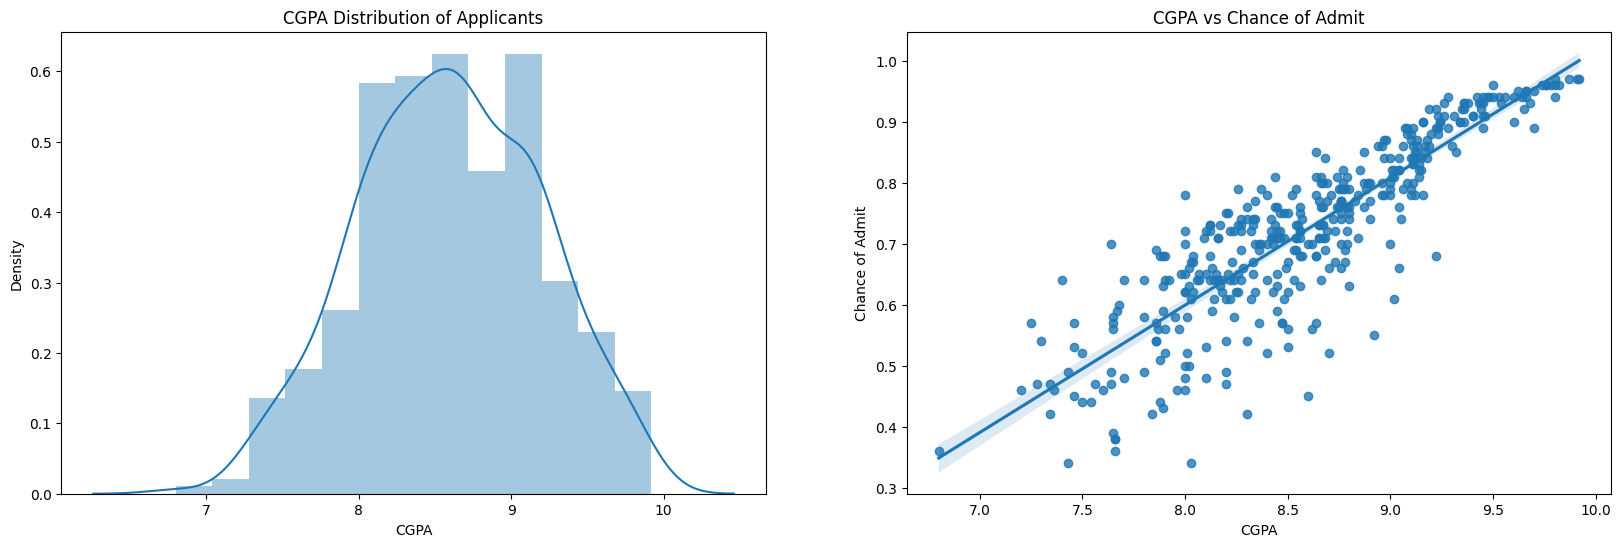

In [10]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.distplot(admissions_df["CGPA"])
plt.title("CGPA Distribution of Applicants")

plt.subplot(1, 2, 2)
sns.regplot(x="CGPA", y="Chance of Admit", data=admissions_df)
plt.title("CGPA vs Chance of Admit")

plt.show()

**GRE Score**

The Graduate Record Examination is a standarized exam, often required for admission to graduate and MBA programs globally. It's made up of three components:

Analytical Writing (Scored on a 0-6 scale in half-point increments)
Verbal Reasoning (Scored on a 130-170 scale)
Quantitative Reasoning (Scored on a 130-170 scale)
In this dataset, the GRE Score is based on a maximum of 340 points. The mean is 317 with a standard deviation of 11.5.

**GRE Score vs Chance of Admit**

GRE scores have a strong correlation with the chance of admission however not as strong as one's CGPA.

Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

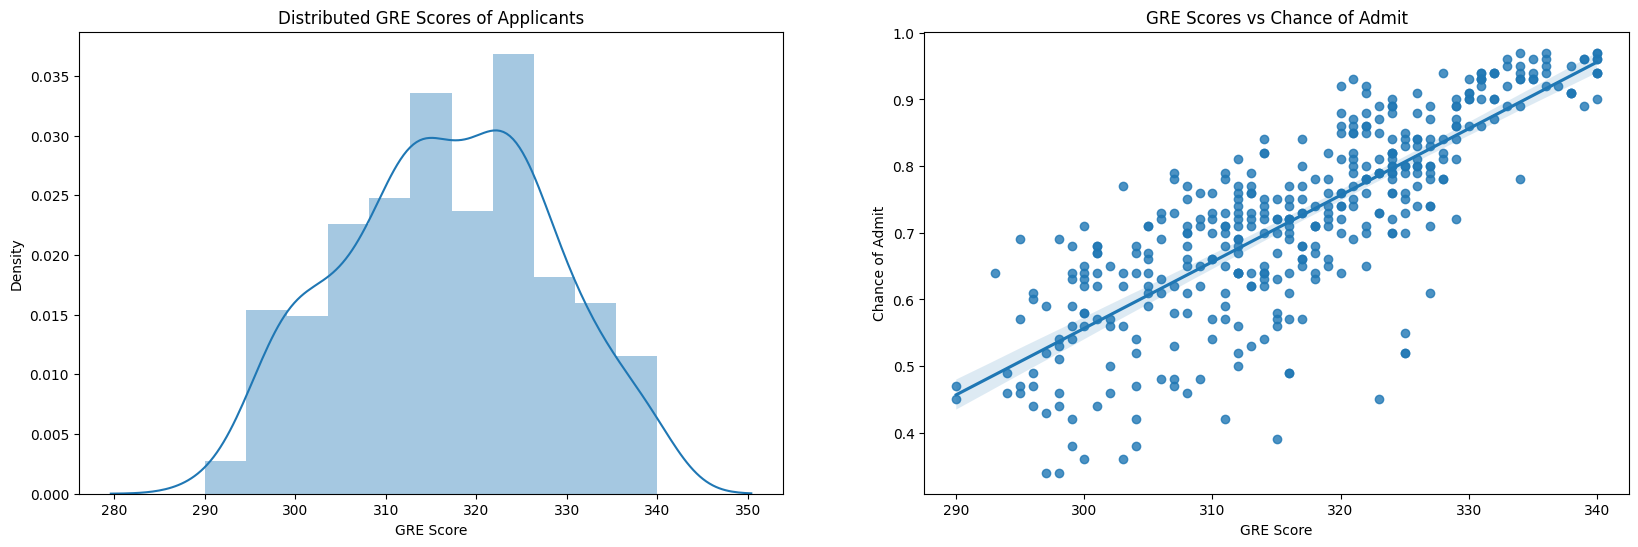

In [11]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.distplot(admissions_df["GRE Score"])
plt.title("Distributed GRE Scores of Applicants")

plt.subplot(1, 2, 2)
sns.regplot(x="GRE Score", y="Chance of Admit", data=admissions_df)
plt.title("GRE Scores vs Chance of Admit")

**TOEFL Score**

The Test of English as a Foreign Language is a standarized test for non-native English speakers that are choosing to enroll in English-speaking universities.

The test is split up into 4 sections:

1. Reading
2. Listening
3. Speaking
4. Writing

All sections are scored out of 30, giving the exam a total score of 120 marks. In this dataset, the TOEFL scores have a mean of 107 and a standard deviation of 6.

**TOEFL Score vs Chance of Admit**

Like GRE scores, the scores received for the TOEFL strongly correlate to an applicants chance of admission.

Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

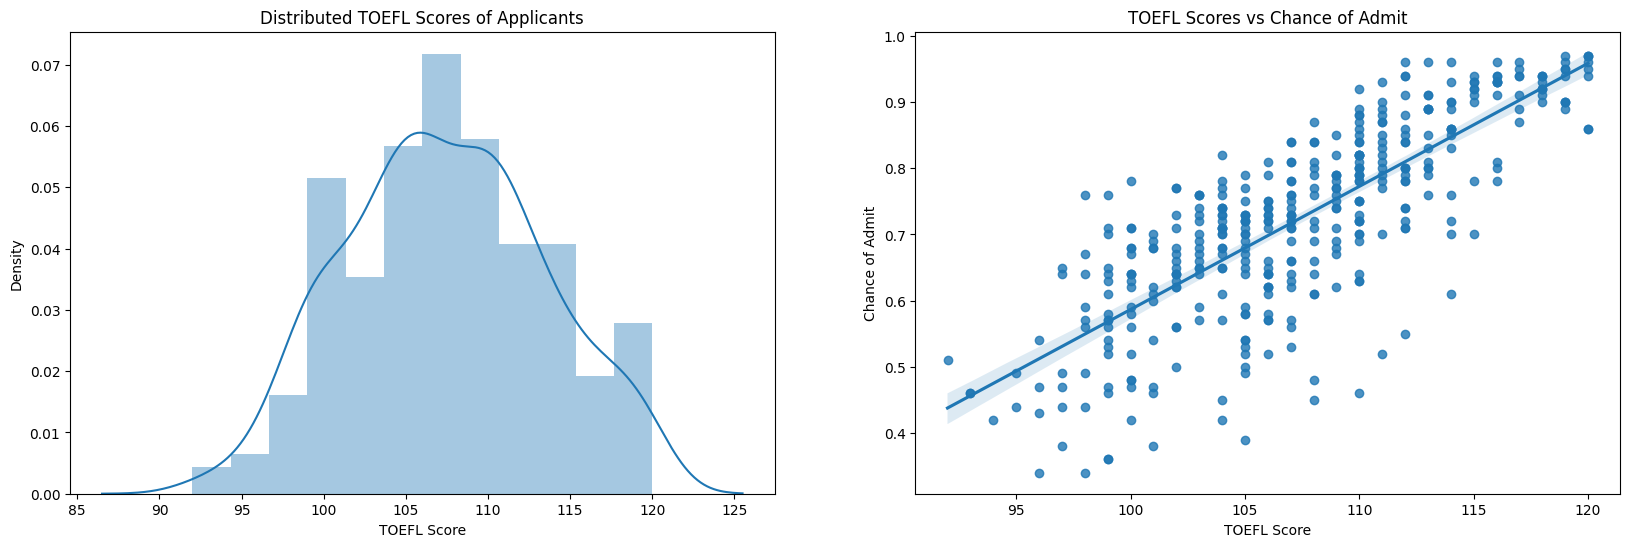

In [12]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.distplot(admissions_df["TOEFL Score"])
plt.title("Distributed TOEFL Scores of Applicants")

plt.subplot(1, 2, 2)
sns.regplot(x="TOEFL Score", y="Chance of Admit", data=admissions_df)
plt.title("TOEFL Scores vs Chance of Admit")

### Modelling

In [13]:
# We split the dataset into features (X) and target variable (y):
X = admissions_df.drop(["Chance of Admit"], axis=1)
y = admissions_df["Chance of Admit"]

# Splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Based on the information obtained, we proceed to implement the models to predict 'Change of Admission'. These models will be Linear Regression, Decision Trees, and Random Forests.

#### Linear Regression

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
lr_score = (lr.score(X_test, y_test)) * 100
lr_score

81.7386788111443

#### Random Forest

In [16]:
dt = DecisionTreeRegressor(random_state=0, max_depth=6)
dt.fit(X_train, y_train)
y_predict = dt.predict(X_test)
dt_score = (dt.score(X_test, y_test)) * 100
dt_score

73.99851580517213

#### Random Forests

In [17]:
rf = RandomForestRegressor(n_estimators=110, max_depth=6, random_state=0)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
rf_score = (rf.score(X_test, y_test)) * 100
rf_score

81.34052472373693

### Comparing Results

We compare the results obtained from the implemented models.

Text(0, 0.5, 'Coefficient of determination')

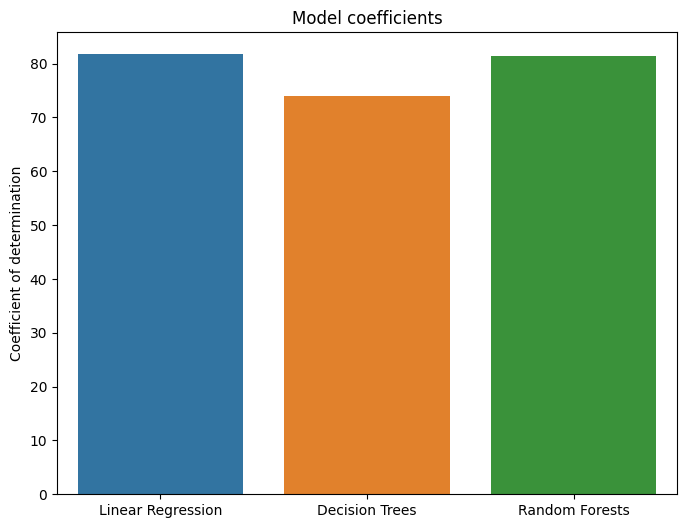

In [18]:
models = ["Linear Regression", "Decision Trees", "Random Forests"]
scores = np.array([lr_score, dt_score, rf_score])

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=models, y=scores)
plt.title("Model coefficients")
plt.ylabel("Coefficient of determination")

### Conclusion

Finally, the coefficients are as follows:

- Linear Regression: 81.74%
- Decision Trees: 74%
- Random Forests: 81.34%

We see that Linear Regression is the best fit model to explain the distribution of our data and will be used to predict the future applicant's chances of admission.

## FIFA22 Dataset

This complex dataset (60 columns, ~20k samples) has information about soccer players from the game. Therefore, many columns are only relevant to the game (which?), but others contain real information that can be used to understand the status of soccer worldwide.

[Original source](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?resource=download&select=players_22.csv)



In [19]:
fifa_df = pd.read_csv("https://facundoq.github.io/datasets/other/players_22.csv")
fifa_df

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


### Importing libraries

### Data Exploration

In [20]:
print(f"The database has {fifa_df.shape[0]} rows and {fifa_df.shape[1]} columns")

The database has 19239 rows and 110 columns


In [21]:
fifa_df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [22]:
# We check the numeric values of our dataset:
fifa_df.select_dtypes(include="number")

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,93,93,78000000.0,320000.0,34,170,72,73.0,1.0,...,96,20,35,24,6,11,15,14,8,NaN
1,188545,92,92,119500000.0,270000.0,32,185,81,21.0,1.0,...,88,35,42,19,15,6,12,8,10,NaN
2,20801,91,91,45000000.0,270000.0,36,187,83,11.0,1.0,...,95,24,32,24,7,11,15,14,11,NaN
3,190871,91,91,129000000.0,270000.0,29,175,68,73.0,1.0,...,93,35,32,29,9,9,15,15,11,NaN
4,192985,91,91,125500000.0,350000.0,30,181,70,10.0,1.0,...,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,47,52,70000.0,1000.0,22,180,64,112541.0,1.0,...,37,38,43,48,6,10,5,15,13,NaN
19235,262040,47,59,110000.0,500.0,19,175,70,445.0,1.0,...,47,37,44,47,11,12,6,8,10,NaN
19236,262760,47,55,100000.0,500.0,21,178,72,111131.0,1.0,...,36,38,44,48,8,6,7,10,6,NaN
19237,262820,47,60,110000.0,500.0,19,173,66,111131.0,1.0,...,47,10,14,11,7,10,7,14,15,NaN


In [23]:
# We check null values, only for numerical columns:
print(fifa_df.select_dtypes(include="number").isnull().sum())

sofifa_id                          0
overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
height_cm                          0
weight_kg                          0
club_team_id                      61
league_level                      61
club_jersey_number                61
club_contract_valid_until         61
nationality_id                     0
nation_team_id                 18480
nation_jersey_number           18480
weak_foot                          0
skill_moves                        0
international_reputation           0
release_clause_eur              1176
pace                            2132
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2132
attacking_crossing                 0
attacking_finishing                0
a

In [24]:
# We check out some basic statistics:
fifa_df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


As we can see, the dataset contains more than 100 columns. That is why, we chose those that we consider can give us more information to our analysis.

In [25]:
fifa_df1 = fifa_df[
    [
        "short_name",
        "age",
        "dob",
        "height_cm",
        "weight_kg",
        "nationality_name",
        "club_name",
        "overall",
        "potential",
        "value_eur",
        "wage_eur",
        "player_positions",
        "preferred_foot",
        "international_reputation",
        "skill_moves",
        "work_rate",
        "pace",
        "shooting",
        "passing",
        "dribbling",
        "defending",
        "physic",
    ]
]

We can divide the data into categorical and numerical values for making more descriptive plots.

In [26]:
categorical = ["work_rate", "international_reputation", "skill_moves", "preferred_foot"]

attributes = [
    "age",
    "height_cm",
    "weight_kg",
    "overall",
    "value_eur",
    "wage_eur",
    "international_reputation",
    "weak_foot",
    "skill_moves",
    "pace",
    "shooting",
    "passing",
    "dribbling",
    "defending",
    "physic",
]

In [27]:
country_count = fifa_df1.nationality_name.value_counts()
counts = country_count.sort_index().reset_index().nationality_name

In [28]:
countries = pd.DataFrame(fifa_df1.groupby(["nationality_name"]).overall.mean())
countries["potential"] = fifa_df1.groupby(["nationality_name"]).potential.mean()
countries.reset_index(inplace=True)

In [29]:
countries["count"] = counts

In [30]:
# Crear el gráfico de mapa utilizando plotly express
fig = px.choropleth(
    countries,
    locations="nationality_name",
    locationmode="country names",
    color="overall",
    color_continuous_scale="Blues",
    title="Average overall score by nationality",
    width=800,
    height=600,
)

# Mostrar el gráfico de mapa
fig.show()

We created a bubble chart to visualize which teams have the most expensive players. To better visualize the information we took the top 10 teams.

In [31]:
# We obtain the data of the most expensive players per team:
top_players = (
    fifa_df1.groupby("club_name")
    .agg({"value_eur": "max", "short_name": "count"})
    .reset_index()
)
top_players.rename(columns={"short_name": "player_count"}, inplace=True)

# Order the teams by the value of the most expensive player in descending order:
top_players = top_players.sort_values(by="value_eur", ascending=False)

# Select the top 10 teams:
top_10_players = top_players.head(10)

# We create bubble chart using plotly express:
fig = px.scatter(
    top_10_players,
    x="club_name",
    y="value_eur",
    size="player_count",
    color="value_eur",
    hover_name="club_name",
    log_x=False,
    log_y=True,
    size_max=30,
    labels={"value_eur": "Players value (EUR)", "player_count": "Number of players"},
)

# We set up the bubble chart layout:
fig.update_layout(
    title="Most expensive players per team (Top 10)",
    xaxis_title="Team",
    yaxis_title="Players value (EUR)",
)

# Plotting:
fig.show()

In [32]:
labels = np.array(
    [
        "shooting",
        "passing",
        "dribbling",
        "defending",
        "overall",
        "potential",
    ]
)

In [33]:
# List of players available for selection:
available_players = fifa_df1["short_name"].unique().tolist()

In [38]:
# Definir la función para generar el gráfico comparativo
def generate_graph(player1, player2):
    labels = np.array(
        ["shooting", "passing", "dribbling", "defending", "overall", "potential"]
    )

    players1 = fifa_df1[fifa_df1["short_name"] == player1][labels].values[0]
    players2 = fifa_df1[fifa_df1["short_name"] == player2][labels].values[0]

    fig = go.Figure()

    fig.add_trace(
        go.Scatterpolar(r=players1, theta=labels, fill="toself", name=player1)
    )

    fig.add_trace(
        go.Scatterpolar(r=players2, theta=labels, fill="toself", name=player2)
    )

    fig.update_layout(autosize=False, width=800, height=600)

    fig.show()


# Crear las listas desplegables para seleccionar los jugadores
player1_dropdown = widgets.Dropdown(options=available_players, description="Player 1:")

player2_dropdown = widgets.Dropdown(options=available_players, description="Player 2:")


# Llamar a la función generate_graph al seleccionar jugadores en las listas desplegables
def on_dropdown_change(change):
    player1 = player1_dropdown.value
    player2 = player2_dropdown.value
    generate_graph(player1, player2)


player1_dropdown.observe(on_dropdown_change, "value")
player2_dropdown.observe(on_dropdown_change, "value")

# Mostrar las listas desplegables
display(player1_dropdown, player2_dropdown)

Dropdown(description='Player 1:', options=('L. Messi', 'R. Lewandowski', 'Cristiano Ronaldo', 'Neymar Jr', 'K.…

Dropdown(description='Player 2:', options=('L. Messi', 'R. Lewandowski', 'Cristiano Ronaldo', 'Neymar Jr', 'K.…